In [1]:
# Random Forest Model
# ------------------
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [5]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [6]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [7]:
# Support Vector Machine (SVM) Model
# ----------------------------------

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score




In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


# Drop unnecessary columns from the training data
X = train_data.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = train_data['Survived']

# Fill missing values for numeric columns in the training data
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
X[numeric_cols] = X[numeric_cols].fillna(X[numeric_cols].mean())

# One-hot encode categorical variables like 'Sex', 'Embarked'
X = pd.get_dummies(X, columns=['Sex', 'Embarked'])

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (SVM works better with scaled data)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Create and train the SVM model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = svm_model.predict(X_val)

# Evaluate the model performance
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.4f}')

# Preprocess the test data for prediction
X_test = test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Fill missing values for numeric columns in the test data
numeric_cols_test = X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[numeric_cols_test] = X_test[numeric_cols_test].fillna(X_test[numeric_cols_test].mean())

# One-hot encode categorical variables in the test data
X_test = pd.get_dummies(X_test, columns=['Sex', 'Embarked'])

# Ensure that the columns in the test set match the training set
X_test = X_test.reindex(columns=X.columns, fill_value=0)

# Scale the test data
X_test = scaler.transform(X_test)

# Make predictions on the test set
test_predictions = svm_model.predict(X_test)

# Prepare the submission file for Kaggle
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})

# Save the submission to a CSV file
submission.to_csv('svm_submission.csv', index=False)

print("Submission file saved as svm_submission.csv")


Validation Accuracy: 0.8045
Submission file saved as svm_submission.csv


In [9]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Assuming you've already preprocessed your data (X_train, X_val, y_train, y_val, X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Train SVM model (with probability enabled)
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Get probability predictions from both models for the validation set
rf_proba_val = rf_model.predict_proba(X_val)
svm_proba_val = svm_model.predict_proba(X_val)

# Average the probabilities
avg_proba_val = (rf_proba_val + svm_proba_val) / 2

# Convert averaged probabilities to final predictions
final_predictions_val = np.argmax(avg_proba_val, axis=1)

# Evaluate ensemble on validation set
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, final_predictions_val)
print(f'Validation Accuracy (Ensemble): {accuracy:.4f}')

# Repeat for the test data
rf_proba_test = rf_model.predict_proba(X_test)
svm_proba_test = svm_model.predict_proba(X_test)

# Average the test set probabilities
avg_proba_test = (rf_proba_test + svm_proba_test) / 2

# Final predictions for the test set
final_predictions_test = np.argmax(avg_proba_test, axis=1)

# Prepare the submission
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': final_predictions_test
})
submission.to_csv('ensemble_submission.csv', index=False)

print("Submission file saved as ensemble_submission.csv")


Validation Accuracy (Ensemble): 0.8156
Submission file saved as ensemble_submission.csv


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Train both models on the training set
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Get the predictions from both models on the validation set
rf_proba_val = rf_model.predict_proba(X_val)
svm_proba_val = svm_model.predict_proba(X_val)

# Stack the predictions horizontally
stacked_val_predictions = np.hstack((rf_proba_val, svm_proba_val))

# Train a meta-model (logistic regression) on the stacked predictions
meta_model = LogisticRegression()
meta_model.fit(stacked_val_predictions, y_val)

# Test meta-model on validation set
final_predictions_val = meta_model.predict(stacked_val_predictions)

# Evaluate the meta-model on the validation set
accuracy = accuracy_score(y_val, final_predictions_val)
print(f'Validation Accuracy (Stacking): {accuracy:.4f}')

# Now, for the test set:
rf_proba_test = rf_model.predict_proba(X_test)
svm_proba_test = svm_model.predict_proba(X_test)

# Stack the predictions for the test set
stacked_test_predictions = np.hstack((rf_proba_test, svm_proba_test))

# Use the meta-model to predict the final outcomes on the test set
final_predictions_test = meta_model.predict(stacked_test_predictions)

# Prepare the submission
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': final_predictions_test
})
submission.to_csv('stacking_submission.csv', index=False)

print("Submission file saved as stacking_submission.csv")


Validation Accuracy (Stacking): 0.8324
Submission file saved as stacking_submission.csv


In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset from Kaggle's input directory
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

# Feature Engineering

# 1. Create FamilySize feature
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# 2. Create IsAlone feature
train_data['IsAlone'] = 1
train_data.loc[train_data['FamilySize'] > 1, 'IsAlone'] = 0
test_data['IsAlone'] = 1
test_data.loc[test_data['FamilySize'] > 1, 'IsAlone'] = 0

# 4. Create FarePerPerson feature
train_data['FarePerPerson'] = train_data['Fare'] / train_data['FamilySize']
test_data['FarePerPerson'] = test_data['Fare'] / test_data['FamilySize']

# Handle missing values in training data using the median
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Fare'].fillna(train_data['Fare'].median(), inplace=True)

# Handle missing values in test data for numeric columns only
numeric_columns = test_data.select_dtypes(include=[np.number]).columns
test_data[numeric_columns] = test_data[numeric_columns].fillna(test_data[numeric_columns].median())

# Check for any remaining missing values in the test data
print("After filling NaNs in numeric columns of test_data:")
print(test_data.isnull().sum())

# Drop non-numeric columns like 'Name', 'Ticket', 'Cabin' if present
train_data = train_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')
test_data = test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')

# One-hot encode categorical features in both train and test datasets
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

# Ensure both datasets have the same columns (this accounts for any differences in dummy variables)
test_data = test_data.reindex(columns=train_data.columns.drop('Survived'), fill_value=0)

# Split the data into features and target
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

# Train-Test Split for evaluation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = gb_model.predict(X_val)

# Calculate validation accuracy
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')

# Predict on the test data after ensuring no missing values
test_predictions = gb_model.predict(test_data)

# Prepare the submission file using correct PassengerId from the test set
submission = pd.DataFrame({
    'PassengerId': pd.read_csv('/kaggle/input/titanic/test.csv')['PassengerId'],  # Ensure the PassengerId is from the test set
    'Survived': test_predictions
})

# Save the submission file
submission.to_csv('gradient_boosting_submission.csv', index=False)

print("Submission file saved as gradient_boosting_submission.csv")


After filling NaNs in numeric columns of test_data:
PassengerId        0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            327
Embarked           0
FamilySize         0
IsAlone            0
FarePerPerson      0
dtype: int64
Validation Accuracy: 0.8436
Submission file saved as gradient_boosting_submission.csv


/tmp/ipykernel_17/4274264860.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
/tmp/ipykernel_17/4274264860.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [12]:
import lime
import shap


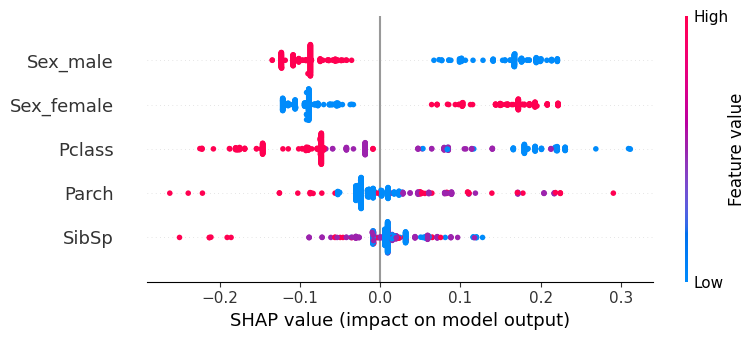

In [13]:
import pandas as pd
import shap
from sklearn.ensemble import RandomForestClassifier

# Load your datasets
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

# Define features used in training
features = ["Pclass", "Sex", "SibSp", "Parch"]

# Apply preprocessing (e.g., pd.get_dummies) to both datasets
X_train = pd.get_dummies(train_data[features])
y_train = train_data["Survived"]

X_test = pd.get_dummies(test_data[features])

# Align columns to ensure consistency
X_train, X_test = X_train.align(X_test, join="left", axis=1)  # Add missing columns to X_test
X_test = X_test.fillna(0)  # Replace NaN with 0 for missing dummy variables

# Train your model (assuming you haven't already)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.TreeExplainer(rf_model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Visualize SHAP explanations for a single prediction
shap.force_plot(explainer.expected_value[1], shap_values[1][0], X_test.iloc[0])

# Visualize global feature importance
shap.summary_plot(shap_values[1], X_test)


In [14]:
# Add predictions and Pclass to the test set
X_test['predictions'] = rf_model.predict(X_test)
X_test['Pclass'] = test_data['Pclass']


# Calculate survival prediction rates by class
pclass_rates = X_test.groupby('Pclass')['predictions'].mean()
print("Survival Prediction Rates by Class:")
print(pclass_rates)

# Calculate Disparate Impact (e.g., Class 3 vs. Class 1)
disparate_impact_class3_vs_class1 = pclass_rates[3] / pclass_rates[1]
print(f"Disparate Impact (Class 3 vs. Class 1): {disparate_impact_class3_vs_class1}")

Survival Prediction Rates by Class:
Pclass
1    0.495327
2    0.376344
3    0.243119
Name: predictions, dtype: float64
Disparate Impact (Class 3 vs. Class 1): 0.49082568807339455


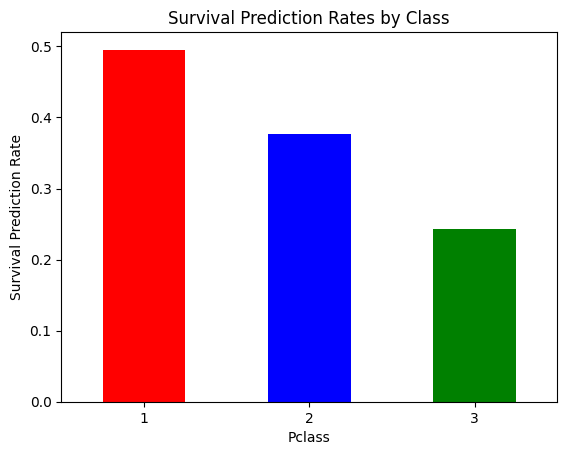

In [15]:
import matplotlib.pyplot as plt

# Calculate survival prediction rates by Pclass
pclass_survival_rate = X_test.groupby('Pclass')['predictions'].mean()

# Plot survival prediction rates by Pclass
pclass_survival_rate.plot(kind='bar', color=['red', 'blue', 'green'])
plt.title("Survival Prediction Rates by Class")
plt.xlabel("Pclass")
plt.ylabel("Survival Prediction Rate")
plt.xticks(rotation=0)
plt.show()


In [16]:
# Disparate Impact between Class 3 and Class 1
disparate_impact = pclass_survival_rate[3] / pclass_survival_rate[1]
print(f"Disparate Impact (Class 3 vs. Class 1): {disparate_impact}")


Disparate Impact (Class 3 vs. Class 1): 0.49082568807339455
